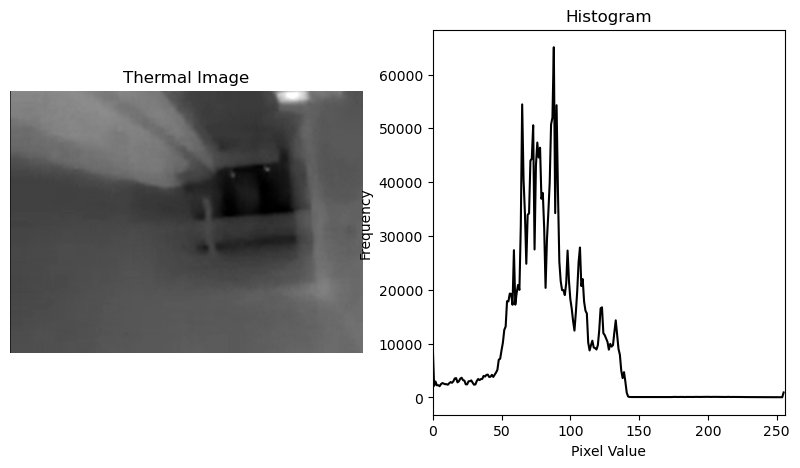

In [27]:
import cv2
import matplotlib.pyplot as plt

# Read the thermal image (assuming it's grayscale)
image = cv2.imread("./image.png", cv2.IMREAD_GRAYSCALE)

# Plot the original thermal image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# plt.imshow(image, cmap='inferno')  # Use a thermal colormap
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.title("Thermal Image")

# Compute histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot histogram
plt.subplot(1, 2, 2)
plt.title("Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist, color='black')
plt.xlim([0, 256])

plt.show()


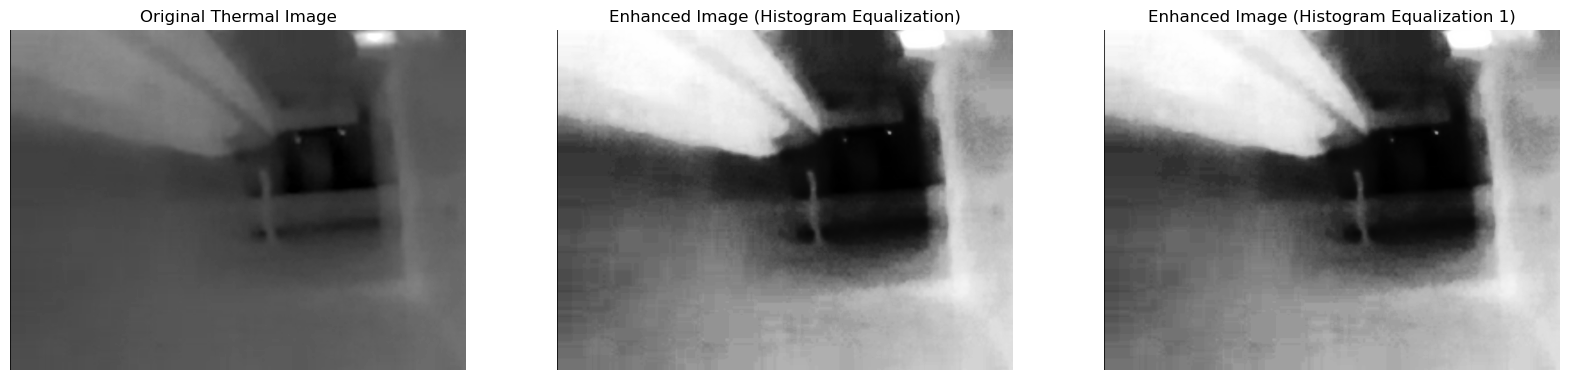

In [28]:
import cv2
import matplotlib.pyplot as plt

# Read the thermal image (grayscale)
image = cv2.imread("./image.png", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized = cv2.equalizeHist(image)
equalized_1 = cv2.equalizeHist(equalized)

# Plot original and enhanced images
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.title("Original Thermal Image")

plt.subplot(1, 3, 2)
plt.imshow(equalized, cmap='gray')
plt.axis("off")
plt.title("Enhanced Image (Histogram Equalization)")

plt.subplot(1, 3, 3)
plt.imshow(equalized_1, cmap='gray')
plt.axis("off")
plt.title("Enhanced Image (Histogram Equalization 1)")

plt.show()


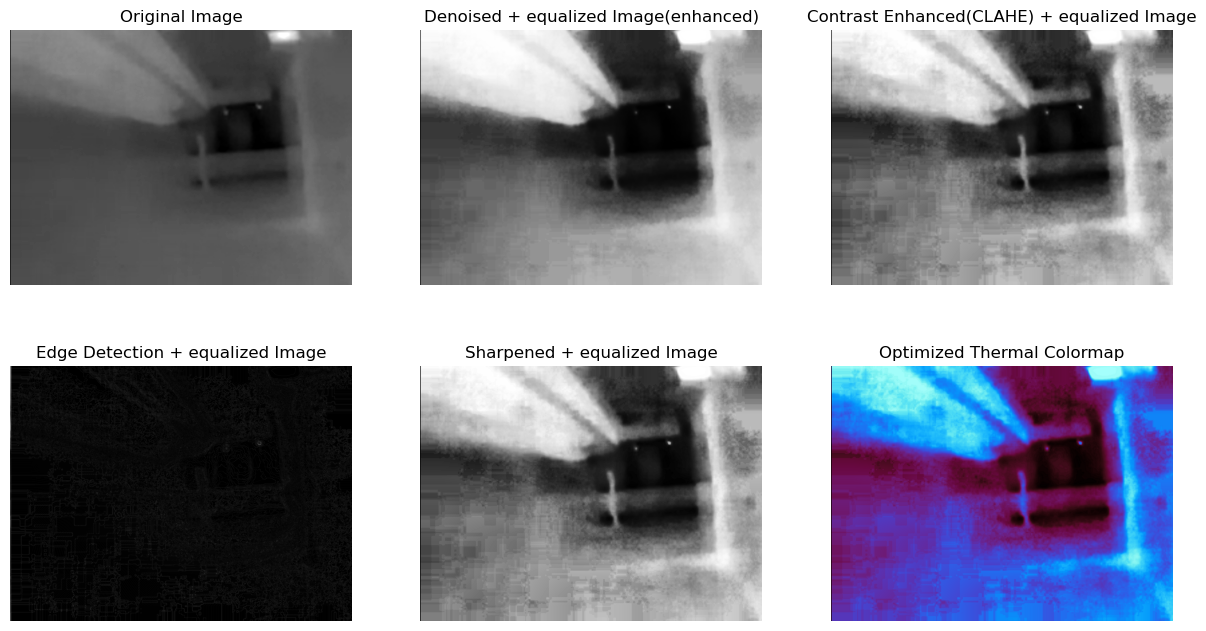

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the thermal image (Grayscale)
image = cv2.imread("./image.png", cv2.IMREAD_GRAYSCALE)
equalized = cv2.equalizeHist(image)

# Step 2: Noise Removal (Denoising)
denoised = cv2.GaussianBlur(equalized, (5, 5), 0)  # Gaussian Blur for smoothing

# Step 3: Contrast Enhancement (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(denoised)

# Step 4: Edge Detection (Laplacian Filter)
edges = cv2.Laplacian(enhanced, cv2.CV_64F)
edges = np.uint8(np.absolute(edges))  # Convert to 8-bit image

# Step 5: Sharpening (Unsharp Masking)
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened = cv2.filter2D(enhanced, -1, sharpening_kernel)

# Step 6: Apply a Thermal Color Map (Optional)
thermal_colored = cv2.applyColorMap(sharpened, cv2.COLORMAP_INFERNO)

# Display Results
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.title("Original Image")

plt.subplot(2, 3, 2)
plt.imshow(denoised, cmap='gray')
plt.axis("off")
plt.title("Denoised + equalized Image(enhanced)")

plt.subplot(2, 3, 3)
plt.imshow(enhanced, cmap='gray')
plt.axis("off")
plt.title("Contrast Enhanced(CLAHE) + equalized Image")

plt.subplot(2, 3, 4)
plt.imshow(edges, cmap='gray')
plt.axis("off")
plt.title("Edge Detection + equalized Image")

plt.subplot(2, 3, 5)
plt.imshow(sharpened, cmap='gray')
plt.axis("off")
plt.title("Sharpened + equalized Image")

plt.subplot(2, 3, 6)
plt.imshow(thermal_colored)
plt.axis("off")
plt.title("Optimized Thermal Colormap")

plt.show()


/tmp/ipykernel_17616/1492154815.py:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  for corner in np.int0(corners):


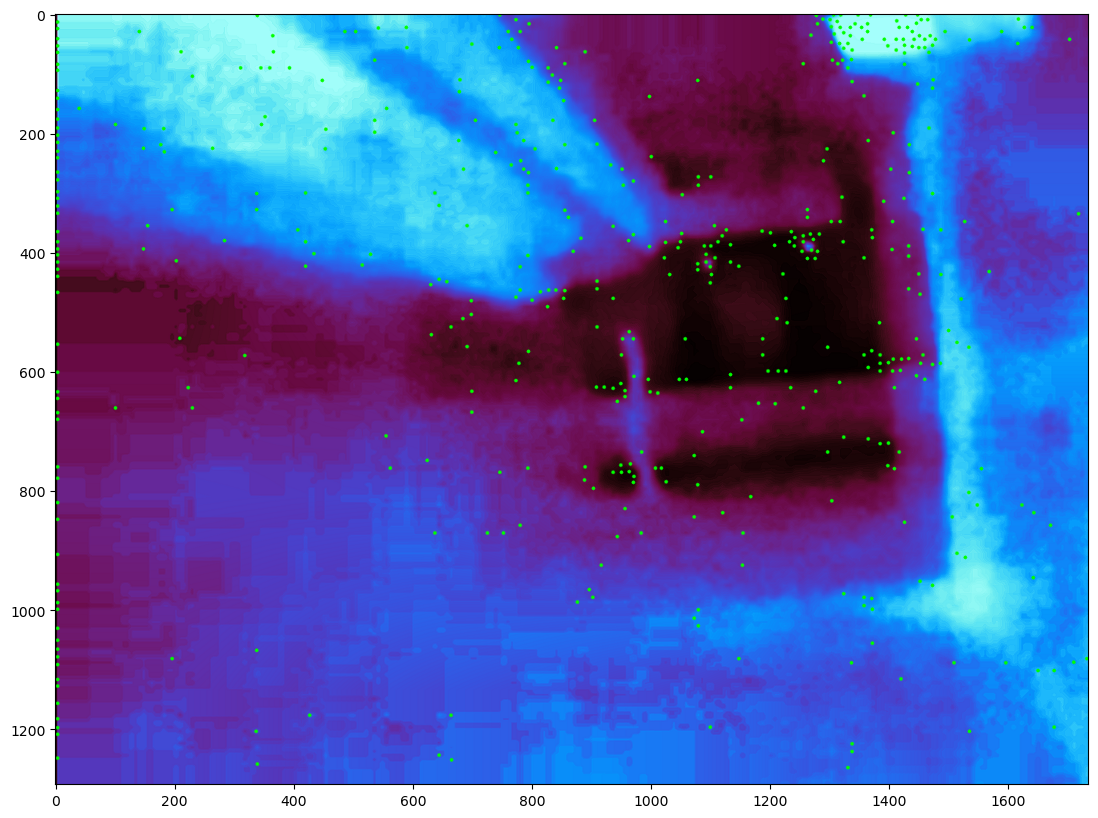

In [42]:
corners = cv2.goodFeaturesToTrack(image, maxCorners=500, qualityLevel=0.01, minDistance=10)
image_color = thermal_colored

for corner in np.int0(corners):
    x, y = corner.ravel()
    cv2.circle(image_color, (x, y), 3, (0, 255, 0), -1)


plt.figure(figsize=(20, 10))
plt.imshow(image_color, cmap='gray')
plt.show()


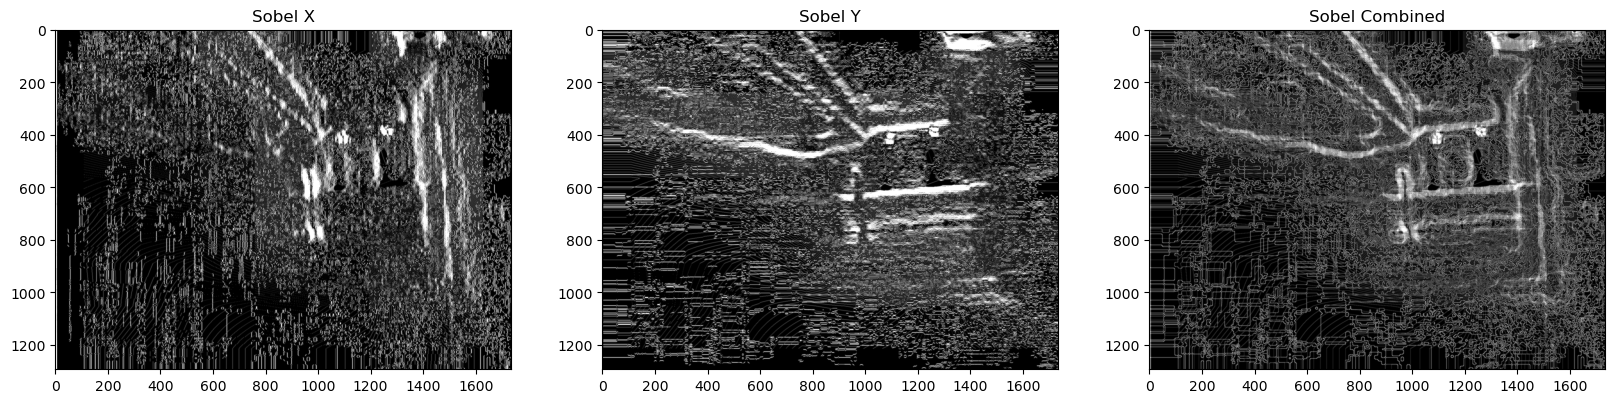

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(image, (5,5), 0)

denoised = cv2.GaussianBlur(blurred, (5, 5), 0)  # Gaussian Blur for smoothing

# Step 3: Contrast Enhancement (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(blurred)

# Step 4: Edge Detection (Laplacian Filter)
edges = cv2.Laplacian(enhanced, cv2.CV_64F)
edges = np.uint8(np.absolute(edges))  # Convert to 8-bit image

# Step 5: Sharpening (Unsharp Masking)
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened = cv2.filter2D(enhanced, -1, sharpening_kernel)

# Apply Sobel filters
sobel_x = cv2.Sobel(sharpened, cv2.CV_64F, 1, 0, ksize=5)  # X-direction
sobel_y = cv2.Sobel(sharpened, cv2.CV_64F, 0, 1, ksize=5)  # Y-direction

# Convert to absolute values and normalize
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Combine both gradients
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# Display results
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 2), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Combined')
plt.show()
